In [1]:
import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs
# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# PCA algorithm from scikit-learn
from sklearn.decomposition import PCA

# Loading the Dataset

In [2]:
data = pd.read_csv('Country_Risk_Premiums.csv')
data = data.dropna()
print(data.shape)
print(data.columns)

(157, 6)
Index(['Country', 'Moody's rating', 'Rating Coding',
       'Rating-based Default Spread', 'Total Equity Risk Premium',
       'Country Risk Premium'],
      dtype='object')


In [3]:
data.head()

,Country,Moody's rating,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium
0,Abu Dhabi,Aa2,3,0.007,0.069,0.009
1,Albania,B1,14,0.067,0.142,0.082
2,Andorra (Principality of),Baa2,9,0.028,0.095,0.035
3,Angola,B3,16,0.096,0.179,0.119
4,Argentina,Ca,20,0.150,0.245,0.185


In [4]:
data.tail()

,Country,Moody's rating,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium
152,Uruguay,Baa2,9,0.028,0.095,0.035
153,Uzbekistan,B1,14,0.067,0.142,0.082
154,Venezuela,C,21,0.150,0.245,0.185
155,Vietnam,Ba3,13,0.053,0.126,0.066
156,Zambia,Ca,20,0.150,0.245,0.185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 6 columns):
Country                        157 non-null object
Moody's rating                 157 non-null object
Rating Coding                  157 non-null int64
Rating-based Default Spread    157 non-null float64
Total Equity Risk Premium      157 non-null float64
Country Risk Premium           157 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.6+ KB


In [6]:
data.describe()

,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium
count,157.000000,157.000000,157.000000,157.000000
mean,10.509554,0.050408,0.122178,0.062178
std,5.371599,0.040299,0.049746,0.049746
min,1.000000,0.000000,0.060000,0.000000
25%,6.000000,0.013000,0.076000,0.016000
50%,11.000000,0.037000,0.106000,0.046000
75%,15.000000,0.082000,0.161000,0.101000
max,21.000000,0.150000,0.245000,0.185000


# Visualizations

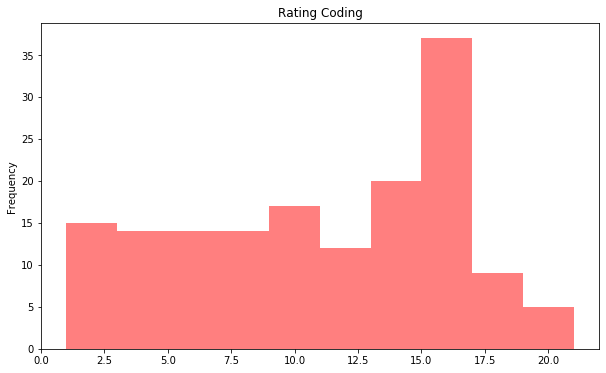

In [7]:
data['Rating Coding'].plot(kind = 'hist', title = 'Rating Coding', alpha = 0.5, color=['red'])

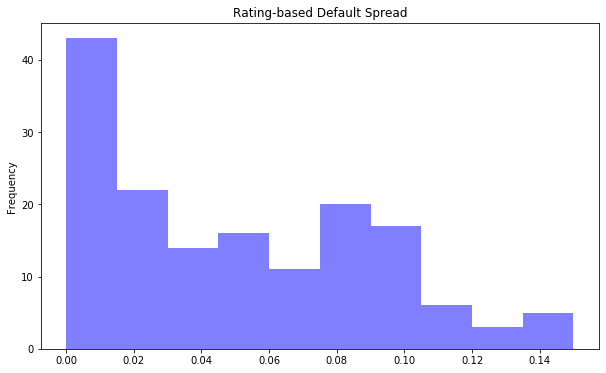

In [8]:
data['Rating-based Default Spread'].plot(kind = 'hist', title = 'Rating-based Default Spread', alpha = 0.5, color=['blue'])

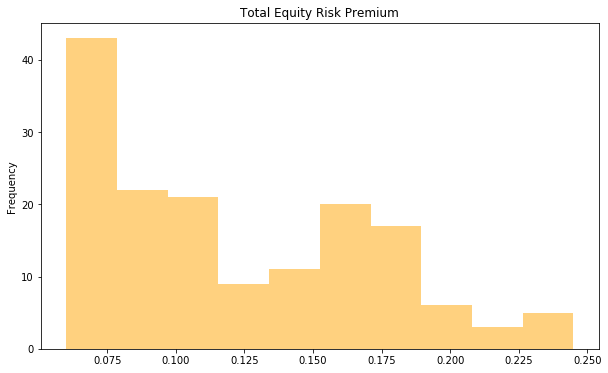

In [9]:
data['Total Equity Risk Premium'].plot(kind = 'hist', title = 'Total Equity Risk Premium', alpha = 0.5, color=['orange'])

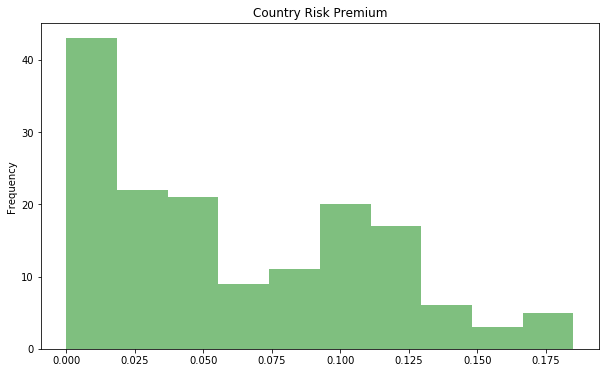

In [10]:
data['Country Risk Premium'].plot(kind = 'hist', title = 'Country Risk Premium', alpha = 0.5, color=['green'])

In [11]:
len(data['Country'].value_counts())

157

# Principal Components Analysis

### Scaled Feature Values

In [12]:
X = data[['Rating Coding','Rating-based Default Spread',
         'Total Equity Risk Premium','Country Risk Premium']]
X = (X - X.mean()) / X.std()
X.head()

,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium
0,-1.398011,-1.077139,-1.068996,-1.068996
1,0.649796,0.411731,0.398457,0.398457
2,-0.281025,-0.556034,-0.546341,-0.546341
3,1.022125,1.131351,1.142234,1.142234
4,1.766782,2.471334,2.468971,2.468971


### Correlation matrix

In [13]:
a = X.corr()
a

,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium
Rating Coding,1.000000,0.949274,0.94876,0.94876
Rating-based Default Spread,0.949274,1.000000,0.99996,0.99996
Total Equity Risk Premium,0.948760,0.999960,1.00000,1.00000
Country Risk Premium,0.948760,0.999960,1.00000,1.00000


### Eigenvectors

In [14]:
from numpy import linalg as LA

w, v = LA.eig([a["Rating Coding"],a["Rating-based Default Spread"]
               ,a["Total Equity Risk Premium"],a["Country Risk Premium"]])
v

array([[ 4.90017472e-01,  8.71701874e-01,  4.32667504e-03,
        -4.08394667e-15],
       [ 5.03322869e-01, -2.78877903e-01, -8.17858915e-01,
         2.76448082e-14],
       [ 5.03263831e-01, -2.84923638e-01,  4.06871033e-01,
        -7.07106781e-01],
       [ 5.03263831e-01, -2.84923638e-01,  4.06871033e-01,
         7.07106781e-01]])

### Eigenvalues

In [15]:
b = np.diag(w)
b

array([[3.92386491e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.60831323e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.19606480e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.22045074e-16]])

### Variance of factor score

In [16]:
c=w
d,e,f,g = c[0],c[1],c[2],c[3]
print("Variance of factor score for",'Rating Coding',"is:",d)
print("Variance of factor score for",'Rating-based Default Spread',"is:",e)
print("Variance of factor score for",'Total Equity Risk Premium',"is:",f)
print("Variance of factor score for",'Country Risk Premium',"is:",g)

Variance of factor score for Rating Coding is: 3.92386490707216
Variance of factor score for Rating-based Default Spread is: 0.07608313227982277
Variance of factor score for Total Equity Risk Premium is: 5.196064801424692e-05
Variance of factor score for Country Risk Premium is: 2.2204507431265497e-16


### Percent of Variance

In [17]:
h, i, j, k = d/len(c), e/len(c), f/len(c), g/len(c)
print('Rating Coding', "alone accounts for",'{:.2%}'.format(h),"of the variance")
print('Rating-based Default Spread',"alone accounts for",'{:.2%}'.format(i),"of the variance")
print('Total Equity Risk Premium', "alone accounts for",'{:.2%}'.format(j),"of the variance")
print('Country Risk Premium', "alone accounts for",'{:.2%}'.format(k),"of the variance")

Rating Coding alone accounts for 98.10% of the variance
Rating-based Default Spread alone accounts for 1.90% of the variance
Total Equity Risk Premium alone accounts for 0.00% of the variance
Country Risk Premium alone accounts for 0.00% of the variance


In [18]:
l = float(h)+float(i)
m = float(h)+float(i)+float(j)
n = float(h)+float(i)+float(j)+float(k)
print('Rating Coding',"accounts for",'{:.2%}'.format(h),"of the variance")
print('Rating Coding',"and",'Rating-based Default Spread',"together account for over",'{:.2%}'.format(l),"of\n the variance")
print('Rating Coding','Rating-based Default Spread',"and",'Total Equity Risk Premium',"together\n account for over",'{:.2%}'.format(m),"of the variance")
print('Rating Coding','Rating-based Default Spread','Total Equity Risk Premium',"and",'Country\n Risk Premium',"together account for exactly",'{:.2%}'.format(n),"of the variance")

Rating Coding accounts for 98.10% of the variance
Rating Coding and Rating-based Default Spread together account for over 100.00% of
 the variance
Rating Coding Rating-based Default Spread and Total Equity Risk Premium together
 account for over 100.00% of the variance
Rating Coding Rating-based Default Spread Total Equity Risk Premium and Country
 Risk Premium together account for exactly 100.00% of the variance


# Cluster Analysis with K-means

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

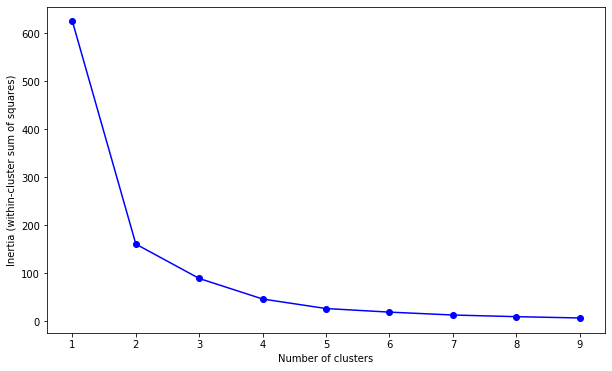

In [19]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

## K means with k=3

In [20]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 88.86146532795854
cluster centers:  [[ 0.21667948 -0.11899536 -0.12132586 -0.12132586]
 [ 1.06592843  1.22477032  1.22658361  1.22658361]
 [-1.13999376 -0.99355287 -0.99317188 -0.99317188]]
cluster labels:  [2 0 0 1 1 0 2 2 2 0 0 1 0 1 1 2 1 1 2 0 1 2 0 0 1 1 1 2 1 2 2 2 0 1 1 0 1
 0 0 1 2 0 2 2 0 1 1 1 2 0 0 2 2 1 0 2 1 0 0 2 0 2 0 2 0 0 1 2 2 2 0 1 2 2
 0 0 1 2 2 1 1 2 1 2 2 2 2 0 2 1 1 2 2 2 1 1 0 0 0 1 0 2 2 1 1 1 2 0 1 2 1
 0 2 0 2 0 2 1 0 0 1 2 0 0 0 2 2 2 1 0 2 1 0 1 1 1 2 2 2 1 0 2 1 0 1 0 2 1
 1 2 2 2 0 0 1 0 1]


## Visualize the result (3D plot)

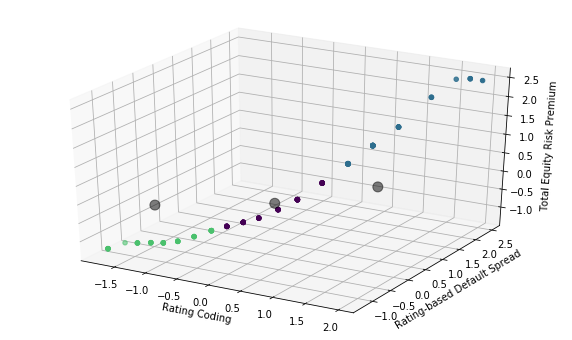

In [21]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Rating Coding')
ax.set_ylabel('Rating-based Default Spread')
ax.set_zlabel('Total Equity Risk Premium')

plt.show()

## Visualize the result (3 2D plots)

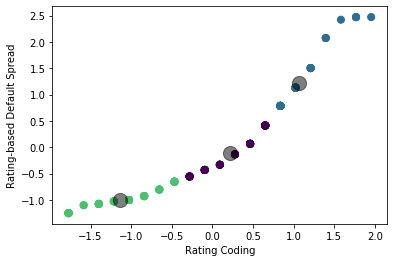

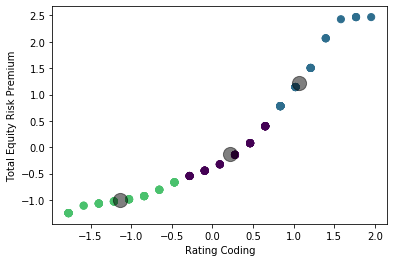

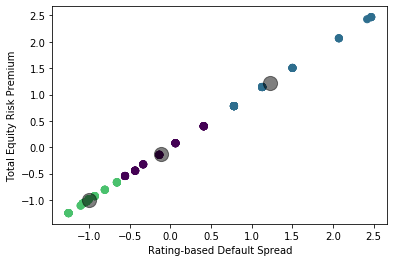

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Rating Coding', 'Rating-based Default Spread', 'Total Equity Risk Premium']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

## Visualize the result (3 2D plots)

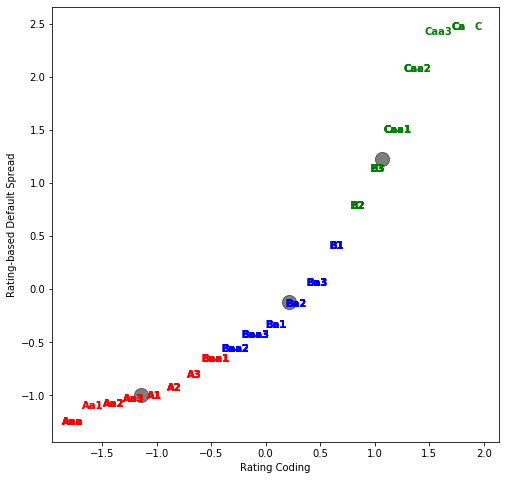

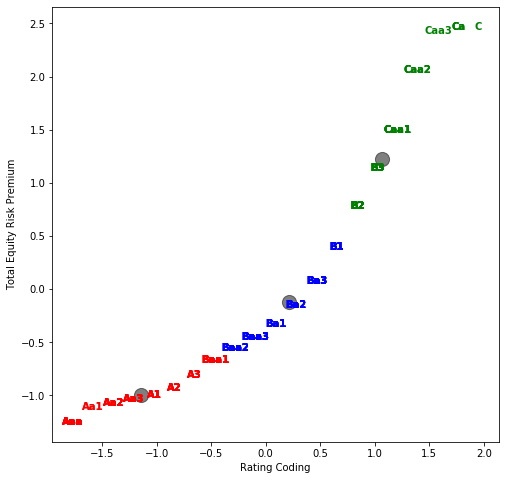

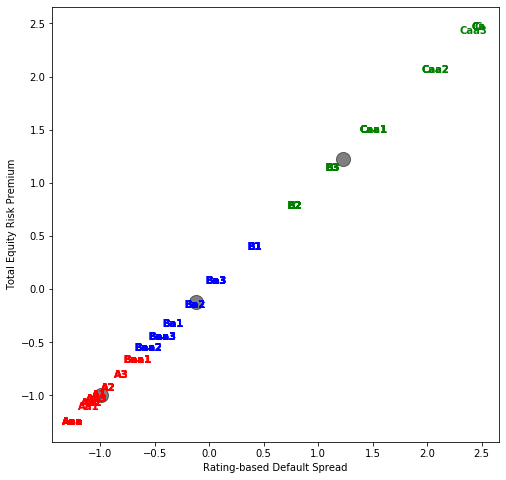

In [23]:
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Rating Coding', 'Rating-based Default Spread', 'Total Equity Risk Premium']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], data["Moody's rating"].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [24]:
cluster = pd.DataFrame({'Country':data['Country'], 'Label':y})
cluster

,Country,Label
0,Abu Dhabi,2
1,Albania,0
2,Andorra (Principality of),0
3,Angola,1
4,Argentina,1
...,...,...
152,Uruguay,0
153,Uzbekistan,0
154,Venezuela,1
155,Vietnam,0


Cluster the country into three groups: 0. high country risk, 1. mid country risk, 2. low country risk

In [25]:
cluster1 = cluster[cluster.Label == 0]
cluster1['Country'].values

array(['Albania', 'Andorra (Principality of)', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Bolivia', 'Brazil', 'Bulgaria',
       'Colombia', 'Cook Islands', "C?te d'Ivoire", 'Croatia', 'Cyprus',
       'Dominican Republic', 'Ethiopia', 'Fiji', 'Georgia', 'Greece',
       'Guatemala', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Italy',
       'Jordan', 'Kazakhstan', 'Macedonia', 'Montenegro', 'Montserrat',
       'Morocco', 'Namibia', 'Oman', 'Paraguay', 'Philippines',
       'Portugal', 'Romania', 'Russia', 'Senegal', 'Serbia', 'Sharjah',
       'South Africa', 'St. Maarten', 'Tanzania', 'Trinidad and Tobago',
       'Turkey', 'Uruguay', 'Uzbekistan', 'Vietnam'], dtype=object)

In [26]:
cluster2 = cluster[cluster.Label == 1]
cluster2['Country'].values

array(['Angola', 'Argentina', 'Bahrain', 'Barbados', 'Belarus', 'Belize',
       'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Congo (Democratic Republic of)',
       'Congo (Republic of)', 'Costa Rica', 'Cuba', 'Ecuador', 'Egypt',
       'El Salvador', 'Gabon', 'Ghana', 'Iraq', 'Jamaica', 'Kenya',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Maldives', 'Mali', 'Moldova',
       'Mongolia', 'Mozambique', 'Nicaragua', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Ras Al Khaimah (Emirate of)',
       'Rwanda', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent & the Grenadines', 'Suriname', 'Swaziland',
       'Tajikistan', 'Togo', 'Tunisia', 'Uganda', 'Ukraine', 'Venezuela',
       'Zambia'], dtype=object)

In [27]:
cluster3 = cluster[cluster.Label == 2]
cluster3['Country'].values

array(['Abu Dhabi', 'Aruba', 'Australia', 'Austria', 'Belgium', 'Bermuda',
       'Botswana', 'Canada', 'Cayman Islands', 'Chile', 'China',
       'Curacao', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Guernsey (States of)', 'Hong Kong',
       'Iceland', 'Ireland', 'Isle of Man', 'Israel', 'Japan',
       'Jersey (States of)', 'Korea', 'Kuwait', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Panama', 'Peru', 'Poland', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turks and Caicos Islands', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [28]:
def get_group(x):
    if x in cluster1['Country'].values:
        return 'High'
    elif x in cluster2['Country'].values:
        return 'Mid'
    else:
        return 'Low'
data['Risk'] = data.Country.apply(get_group)

In [29]:
data.head()

,Country,Moody's rating,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium,Risk
0,Abu Dhabi,Aa2,3,0.007,0.069,0.009,Low
1,Albania,B1,14,0.067,0.142,0.082,High
2,Andorra (Principality of),Baa2,9,0.028,0.095,0.035,High
3,Angola,B3,16,0.096,0.179,0.119,Mid
4,Argentina,Ca,20,0.150,0.245,0.185,Mid


In [30]:
data.tail()

,Country,Moody's rating,Rating Coding,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium,Risk
152,Uruguay,Baa2,9,0.028,0.095,0.035,High
153,Uzbekistan,B1,14,0.067,0.142,0.082,High
154,Venezuela,C,21,0.150,0.245,0.185,Mid
155,Vietnam,Ba3,13,0.053,0.126,0.066,High
156,Zambia,Ca,20,0.150,0.245,0.185,Mid


In [31]:
data.to_csv('country_risk.csv', index=False, encoding='utf-8')